No handles with labels found to put in legend.


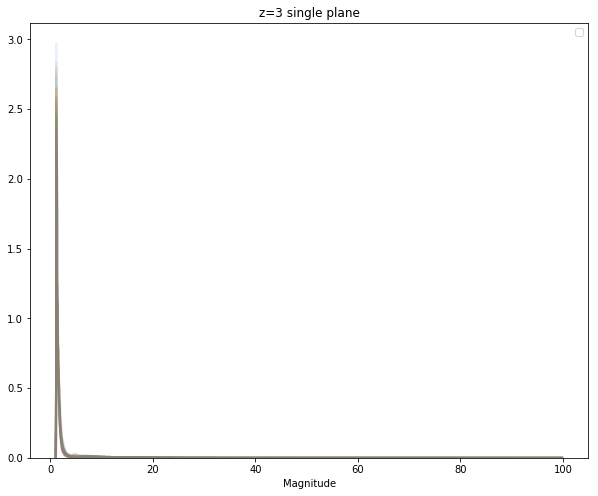

In [14]:
import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

# matplotlib.rcParams.update({'font.size': 22})
muavg = [0 for n in range(103041)]
muavgsq= [0 for n in range(103041)]

counts=np.zeros([40,999])
bins=np.zeros([40,1000])


# print(mu)
run_num=40
n_bins = np.linspace(1, 100, num=1000)
j=0
fig, ax = plt.subplots(figsize=(10, 8))
for filename in glob.glob('../../A370/buffalo/range_z9/mag*.dat'):
    
#     print(j)
    mag= np.genfromtxt(filename, dtype=(
        {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 
         'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
#     nparray=mag['mag']
#     nparray[nparray == 0] = np.nan
    
    mag['mag'][0]=1
    nparray=mag['mag']
    muavg=muavg+nparray
    muavgsq=muavgsq+nparray*nparray
    nparray[nparray == 0] = np.nan
    m=2.5*np.log10(nparray)
    
    
    
#     print(len(m))
    
    
    
    
    counts[j], bins[j], what=ax.hist(nparray, n_bins, density=True, histtype='step',cumulative=False,linewidth=2,alpha=0.1)
    j=j+1

# muavg[muavg == 0] = np.nan
# muavgsq[muavgsq == 0] = np.nan
# muavg=abs(2.5*np.log10(muavg/run_num))
# muavgsq=2.5*np.log10(muavgsq/run_num)

# for i in range(len(muavg)):
#         if muavg[i]==0 :
#             print(i)

# ax.hist(muavgsum, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,label='Plummers Averaged')
# ax.hist(muavg, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,label='Grale Runs Averaged')
# ax.plot([4,5.25],[0.09,0.009],color="LightGray")
# print(muavgsq)
# print(min(muavg))
# plt.grid(True)
plt.axis()
ax.set_title('z=3 single plane')
ax.set_xlabel('Magnitude')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
ax.legend(loc='upper right')
plt.show()
fig.savefig('z9_ind_runs.png', dpi=300)

In [15]:
print(len(muavg))
print(sum(~np.isnan(muavg)))

103041
103041


In [16]:
def phiL(M):
    return 0.4*math.log(10)*phistar*10**(-0.4*(M-Mstar)*(alpha+1))*math.exp(-10**(-0.4*(M-Mstar)))

[-24, -14, 1e-07, 0.1]

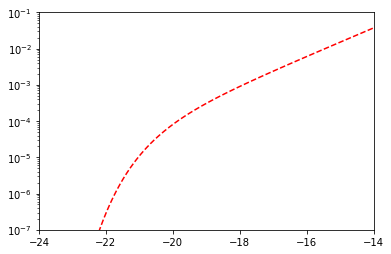

In [17]:
M = np.linspace(-24, -14, num=100)
import math
phistar=10**(-3.88)
Mstar=-20.35
alpha=-1.98
x=np.zeros(len(M))
for i in range(len(M)): 
    x[i]=phiL(M[i])
plt.plot(M,x,'r--')
plt.yscale('log')
plt.axis([-24,-14,10**(-7),0.1])

In [18]:
N=len(counts[1])

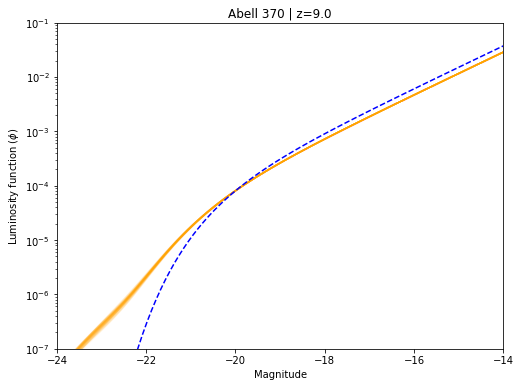

In [27]:
fig, ax = plt.subplots(figsize=(8,6))

phi=np.zeros([40,len(M)])
for i in range(40):
    for j in range(len(M)):
        for k in range(N):
            phi[i,j]+=(1/bins[i,k+1])*phiL(M[j]+2.5*np.log10(bins[i,k+1]))*counts[i,k]/13
    plt.plot(M,phi[i,:],alpha=0.1,color='orange')
plt.plot(M,x,'b--')
plt.yscale('log')
plt.axis([-24,-14,10**(-7),0.1])
ax.set_title('Abell 370 | z=9.0')
ax.set_xlabel('Magnitude')
ax.set_ylabel('Luminosity function ($\phi$)')
plt.show()
plt.show()


fig.savefig('/Users/agnivaghosh/Downloads/Lensing/mag/plots/LF_A370_buffalo.pdf', dpi=300, transparent=True, bbox_inches='tight')

In [29]:
meancount=np.mean(phi,axis=0)
meansqcount=np.mean(phi**2,axis=0)
sd=np.sqrt(meansqcount-meancount**2)

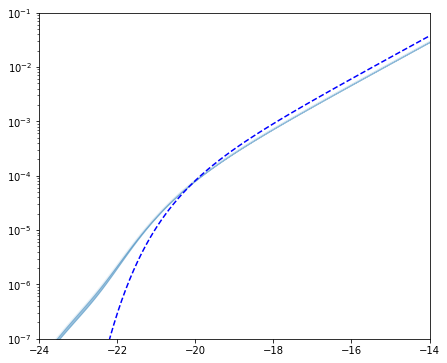

In [43]:
plt.subplots(figsize=(7,6))

plt.plot(M, meancount+sd,alpha=0.1,linewidth=2,color='tab:blue')
plt.plot(M, meancount-sd,alpha=0.1,linewidth=2,color='tab:blue')
plt.fill_between(M, meancount+sd, meancount-sd,alpha=0.4,color='tab:blue')


plt.plot(M,x,'b--')

# plt.grid(True)
plt.axis()
plt.yscale('log')
ax.set_title('z=3 single plane')
ax.set_xlabel('Magnitude')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
# ax.legend(loc='upper right')

plt.axis([-24,-14,10**(-7),0.1])
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'int'

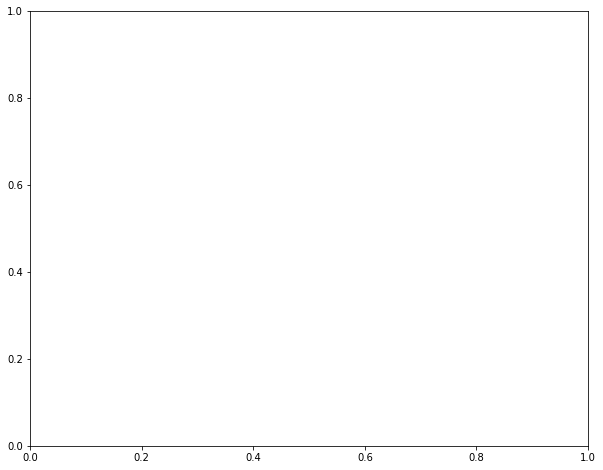

In [28]:
len(meancount)

In [291]:
np.sum(counts,axis=1)

array([32714., 28305., 33047., 30799., 32917., 31535., 30510., 33944.,
       33445., 32769., 35410., 32154., 32184., 34110., 33579., 32221.,
       35384., 32631., 33411., 32730., 36046., 28887., 31439., 31798.,
       34592., 29991., 32469., 34193., 34832., 31178., 32308., 33404.,
       31820., 32062., 33203., 35032., 29606., 34076., 34363., 31943.])

In [363]:
print(bins[0])

[  1.           1.0990991    1.1981982    1.2972973    1.3963964
   1.4954955    1.59459459   1.69369369   1.79279279   1.89189189
   1.99099099   2.09009009   2.18918919   2.28828829   2.38738739
   2.48648649   2.58558559   2.68468468   2.78378378   2.88288288
   2.98198198   3.08108108   3.18018018   3.27927928   3.37837838
   3.47747748   3.57657658   3.67567568   3.77477477   3.87387387
   3.97297297   4.07207207   4.17117117   4.27027027   4.36936937
   4.46846847   4.56756757   4.66666667   4.76576577   4.86486486
   4.96396396   5.06306306   5.16216216   5.26126126   5.36036036
   5.45945946   5.55855856   5.65765766   5.75675676   5.85585586
   5.95495495   6.05405405   6.15315315   6.25225225   6.35135135
   6.45045045   6.54954955   6.64864865   6.74774775   6.84684685
   6.94594595   7.04504505   7.14414414   7.24324324   7.34234234
   7.44144144   7.54054054   7.63963964   7.73873874   7.83783784
   7.93693694   8.03603604   8.13513514   8.23423423   8.33333333
   8.432432